### 0. Importing all necessary libraries

In [5]:
# For data frame operations
import pandas as pd

# Array conversion
import numpy as np   

# For plots
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

# Word cloud generation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# ML libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm

### I. Familiarizing with the SMS Spam Texts dataset

In [20]:
# Read the SMS Spam text dataset
df = pd.read_csv('Data/Dataset.csv')

In [7]:
# Display first five rows
#df.head()
corpus = df["Message"]
corpus
#df.drop(['Category'], axis =1)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [8]:
# Basic information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


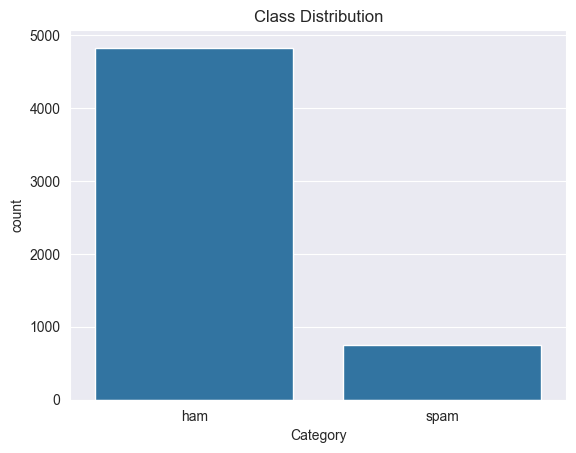

In [10]:
# Visualize the class ditribution in the dataset

sns.countplot(x='Category', data=df)
plt.title('Class Distribution')
plt.show()  # ham is the major class, Spam is minor

### II. Wordcloud Analysis

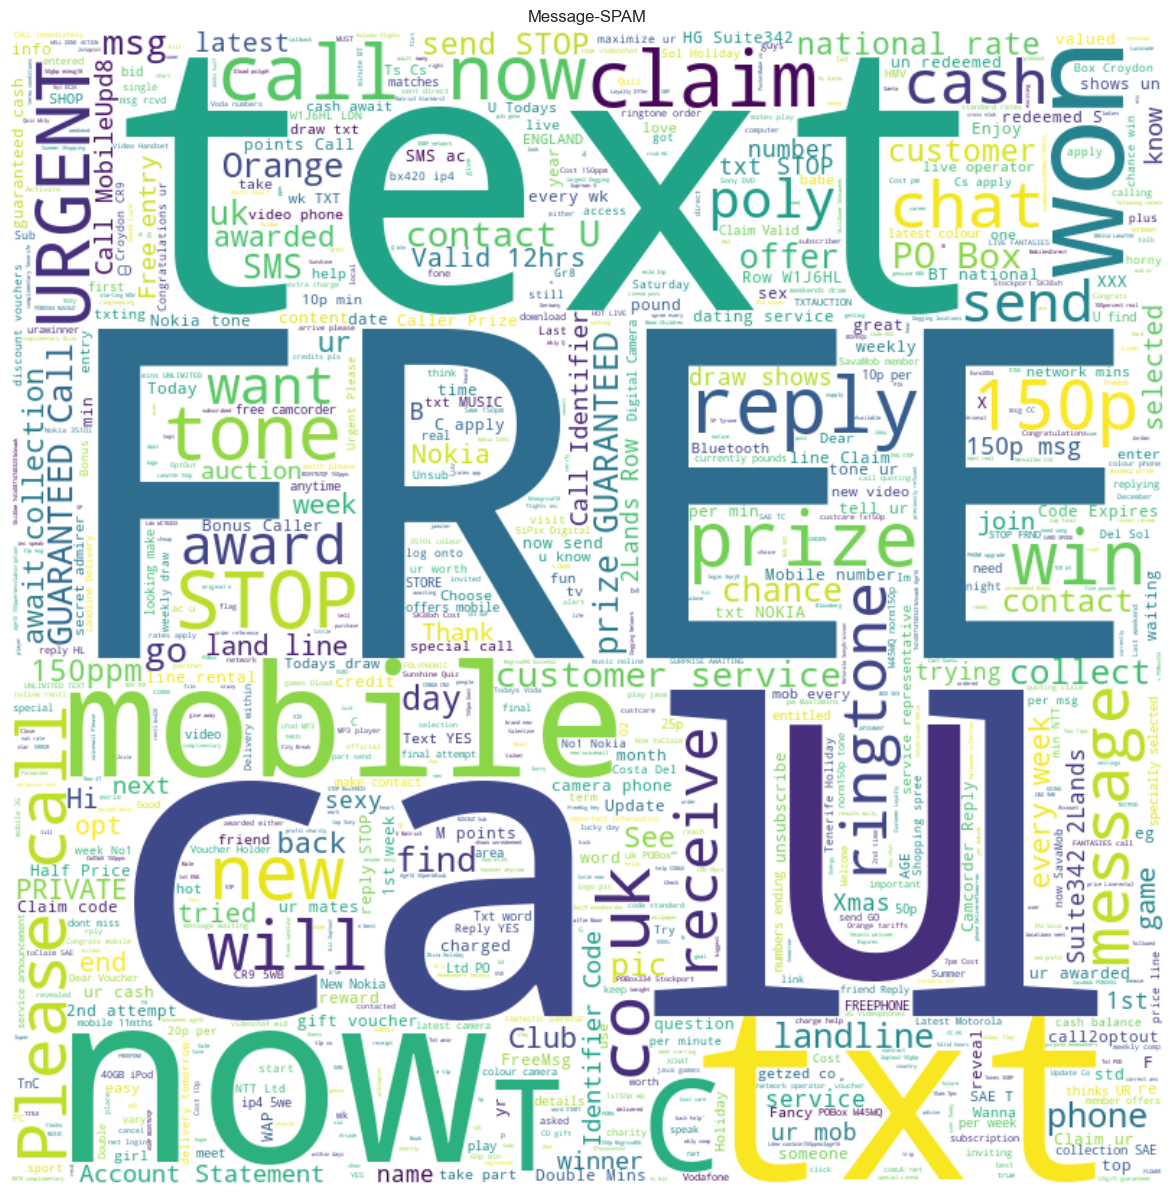

In [11]:
# Wordcloud for spam texts

spam = df[df["Category"]=='spam']
spam_words = " ".join(comment for comment in spam["Message"])
wordcloud = WordCloud(max_words=1000,background_color="white", width=800, height=800,
                 contour_width=3, contour_color='firebrick').generate(spam_words)
# Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Message-SPAM")
plt.axis("off")
plt.show()

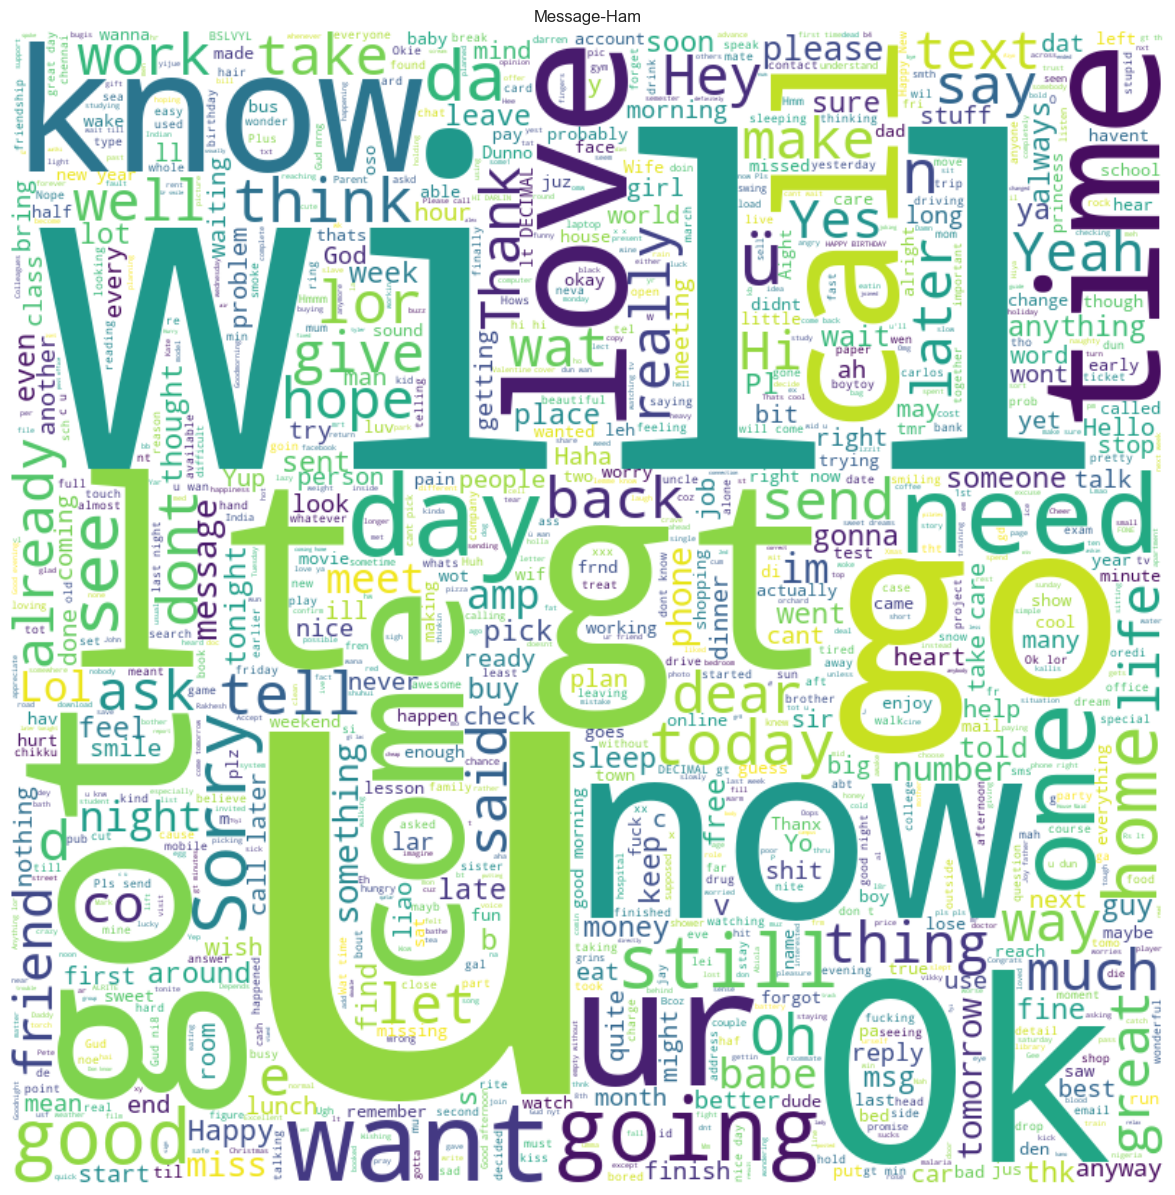

In [12]:
# Wordcloud for ham texts

ham = df[df["Category"]=='ham']

ham_words = " ".join(comment for comment in ham["Message"])
wordcloud = WordCloud(max_words=1000,background_color="white", width=800, height=800,
                     contour_width=3, contour_color='firebrick').generate(ham_words)
 # Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Message-Ham")
plt.axis("off")
plt.show()

### III. Data Preparation

In [13]:
# BoW - Bag of words 

# create a corpus for the vectorizer
corpus = df['Message'] 

# initialize CV object
vectorizer = CountVectorizer()

# Create vocabulary and transform to numeric data using the fit_transform() method
bow_matrix = vectorizer.fit_transform(corpus)

In [14]:
# making the dataframe

#get the bow matrix form 
bow_df = pd.DataFrame(bow_matrix.toarray())

# Intoduce the target feature to bow_df
bow_df['label'] = df['Category'].values

### IV. Modelling using SVM

In [15]:
# Splitting data into Train and Test

X = bow_df.drop(['label'], axis=1) # Training set
y = bow_df[['label']] # Target feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# perform ML

clf = svm.SVC() # Instantiate classifier

In [16]:
accuracy = cross_val_score(clf, X.values, y.values, scoring='accuracy',cv=3)
print(accuracy)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

/Users/debasmita/Downloads/SMS-Spam-Detection-Using-SVM-main/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/debasmita/Downloads/SMS-Spam-Detection-Using-SVM-main/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/debasmita/Downloads/SMS-Spam-Detection-Using-SVM-main/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.97308934 0.97522886 0.98276791]
Accuracy of Model with Cross Validation is: 97.70287041207358


In [18]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

In [19]:
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)